# CNMF-E demo pipeline: Intro 
This notebook demonstrates how to use Caiman for processing 1p microendoscopic data. It shows how to use Caiman for the following steps:

![workflow diagram](../../docs/img/full_cnmfe_workflow.jpg)

1. Apply the NoRMCorre (nonrigid motion correction) algorithm for motion correction.
2. Apply the constrained nonnegative matrix factorization endoscopic (CNMF-E) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.
3. Apply quality control metrics to evaluate the initial estimates, and narrow down to the final set of estimates.

Some basic visualizations are also included. 

> This demo follows a similar pattern to the CNMF demo in `demo_pipeline.ipynb`, but includes less explanation except where there are important differences. If you want to get a more explanation-heavy picture of the fundamentals, we suggest starting with that demo first.

## Imports and general setup

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
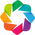

In [1]:
import cv2
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
        get_ipython().run_line_magic('matplotlib', 'qt')
except NameError:
    pass

try:
    cv2.setNumThreads(0)
except:
    pass
import bokeh.plotting as bpl
import holoviews as hv

bpl.output_notebook()
hv.notebook_extension('bokeh')

Set up logger and environment variables

In [2]:
# set up logging
logging.basicConfig(format="{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}",
                    filename=None, 
                    level=logging.WARNING, style="{") #logging level can be DEBUG, INFO, WARNING, ERROR, CRITICAL

# set env variables 
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

## Select file(s) to be processed
Here, we analyze the data in `data_endoscope.tif`. The `download_demo` function will download the  file for you and return the complete path to the file which will be stored in your `caiman_data` directory. If you adapt this demo for your data make sure to pass the complete path to your file. 

Note that the memory requirement of the CNMF-E algorithm are much higher compared to the standard CNMF algorithm. You should test your system before trying to process very large amounts of data.

In [3]:
movie_path = download_demo('data_endoscope.tif')  

## Load and visualize raw data
We visualize using the built-in movie object, which is described in detail in `demo_pipeline.ipynb`. In addition to neural activity, you can also see blood flow in the movie.

In [4]:
# press q to close
movie_orig = cm.load(movie_path) 
downsampling_ratio = 0.2  # subsample 5x
movie_orig.resize(fz=downsampling_ratio).play(gain=0.9,
                                              q_max=99.5, 
                                              fr=30,
                                              plot_text=True,
                                              magnification=2,
                                              do_loop=False,
                                              backend='opencv')

## Set up a cluster
To enable parallel computing we will set up a local cluster. The resulting variable `cluster` contains the pool of processors (CPUs) that will be used in later steps. If you use `dview=cluster` in later steps, then parallel processing will be used. If you use `dview=None` then no parallel processing will be used. The `num_processors_to_use` variable determines how many CPU dores you will use (when set to `None` it goes to the default of one less than the number available):

In [5]:
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

You have 16 CPUs available in your current environment


Set up a cluster of processors. If one has already been set up (the multiprocessing_pool variable is already in your namespace), then that cluster will be closed and a new one created.

In [6]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

Setting up new cluster
Successfully set up cluster with 15 processes


## Set up some parameters
We first set some parameters related to the data and motion correction and create a `params` object. We'll modify this parameter object later on with settings for source extraction. You can also set all the parameters at once as demonstrated in the `demo_pipeline.ipynb` notebook.

Note here we are setting `pw_rigid` to `False` as our data seems to mainly contain large-scale translational motion. We can always redo this later if it turns out to be a mistake.

In [7]:
# dataset dependent parameters
frate = 10                       # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # size of high pass spatial filtering, used in 1p data
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)      # overlap between patches (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': movie_path,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

parameters = params.CNMFParams(params_dict=mc_dict)

## Motion Correction
The background signal in micro-endoscopic data is very strong and makes motion correction challenging. Hence, as a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the lower-frequency background activity and enhance spatial landmarks. The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no spatial filtering is performed (default option, used in 2p data for CNMF). 

After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data, so no information is lost before source separation. The motion corrected files are saved in memory mapped format. If no motion correction is performed (i.e., `motion_correct` was set to `False`), then the file gets directly memory mapped.

> For a more detailed exploration of Caiman's motion correction pipeline, see `demo_motion_correction.ipynb`. 

The following also plots the discovered displacements in x- and y- in the movie.

In [8]:
%%time
if motion_correct:
    # do motion correction rigid
    mot_correct = MotionCorrect(movie_path, dview=cluster, **parameters.get_group('motion'))
    mot_correct.motion_correct(save_movie=True)
    fname_mc = mot_correct.fname_tot_els if pw_rigid else mot_correct.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mot_correct.x_shifts_els)),
                                     np.max(np.abs(mot_correct.y_shifts_els)))).astype(int)
    else:
        bord_px = np.ceil(np.max(np.abs(mot_correct.shifts_rig))).astype(int)
        # Plot shifts
        plt.plot(mot_correct.shifts_rig)  # % plot rigid shifts
        plt.legend(['x shifts', 'y shifts'])
        plt.xlabel('frames')
        plt.ylabel('pixels')
        plt.gcf().set_size_inches(6,3)

    bord_px = 0 if border_nan == 'copy' else bord_px
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    fname_new = cm.save_memmap(movie_path, base_name='memmap_',
                               order='C', border_to_0=0, dview=dview)

2023-10-19 22:55:29,053 - WARNING - [movies.py extract_shifts() 341] - pid 19484 - Movie average is negative. Removing 1st percentile.
2023-10-19 22:55:29,053 - WARNING - [movies.py extract_shifts() 359] - pid 19484 - Movie average is negative. Removing 1st percentile.
2023-10-19 22:55:29,081 - WARNING - [movies.py extract_shifts() 341] - pid 19484 - Movie average is negative. Removing 1st percentile.
2023-10-19 22:55:29,081 - WARNING - [movies.py extract_shifts() 359] - pid 19484 - Movie average is negative. Removing 1st percentile.
2023-10-19 22:55:29,109 - WARNING - [movies.py extract_shifts() 341] - pid 19484 - Movie average is negative. Removing 1st percentile.
2023-10-19 22:55:29,113 - WARNING - [movies.py extract_shifts() 359] - pid 19484 - Movie average is negative. Removing 1st percentile.


CPU times: total: 719 ms
Wall time: 14.9 s


Compare original and motion corrected movie. Note they look pretty similar, as there wasn't much motion to begin with. You can see from the shift plot (plotted above) that the extracted shifts were all very small.

In [9]:
movie_corrected = cm.load(mot_correct.mmap_file) # load motion corrected movie
ds_ratio = 0.2
cm.concatenate([movie_orig.resize(1, 1, ds_ratio) - mot_correct.min_mov*mot_correct.nonneg_movie,
                movie_corrected.resize(1, 1, ds_ratio)], 
                axis=2).play(fr=20, 
                             gain=0.9, 
                             magnification=2) 

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.81it/s]


## Load memory mapped file
Memory mapping is discussed in some detail in `demo_pipeline.ipynb`.

In [10]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

## Parameter setting for CNMF-E
Everything is now set up to run source extraction with CNMFE.  We first will define some parameters. We will construct a new dictionary and use this to modify the *existing* `parameters` object, using the `change_params()` method.

You will likely notice a few differences from the CNMF use case. We will explain the important parameters below. For now, note that we have set `gnb` to `0`: this is effectively the flag telling Caiman to use CNMFE instead of CNMF. 

There are *two* main differences between the CNMF and CNMFE source separation algorithms. The first is the background model (this is discussed in the sidebar below on the Ring Model). The second difference is in how the models are initialized. This is addressed below when we go over setting corr/pnr thresholds for initialization, which we did not have to do for our 2p data.

In [11]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None for CNMFE
gSig = np.array([3, 3])  # expected half-width of neurons in pixels 
gSiz = 4*gSig + 1     # half-width of bounding box created around neurons during initialization
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels 
tsub = 2            # downsampling factor in time for initialization, increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization, increase if you have memory problems
gnb = 0             # number of background components (rank) if positive, set to 0 for CNMFE
low_rank_background = None  # None leaves background of each patch intact (use True if gnb>0)
nb_patch = 0        # number of background components (rank) per patch (0 for CNMFE)
min_corr = .8       # min peak value from correlation image
min_pnr = 10        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background (increase to 2 if slow)
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

parameters.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # True for 1p
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px})                # number of pixels to not consider in the borders)

CNMFParams:

data:

{'caiman_version': '1.9.16',
 'decay_time': 0.4,
 'dims': (128, 128),
 'dxy': (1, 1),
 'fnames': ['C:\\Users\\Eric\\caiman_data\\example_movies\\data_endoscope.tif'],
 'fr': 10,
 'last_commit': 'GITW-762db465262693302fd4e3395d3c4a0f5cd9c6cb',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 0,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvolution': 'oasis

In [12]:
cnmfe_model = cnmf.CNMF(n_processes=n_processes, 
                        dview=cluster, 
                        params=parameters)

<div class="alert alert-info">
    <h2 >CNMF-E: The Ring Model</h2>
   Background activity is very ill-behaved with 1p recordings: it often fluctuates locally and is much larger in magnitude than the neural signals we want to extract. In other words, the large-scale background model used for CNMF is not sufficient for most 1p data. Hence, Pengcheng Zhou and others came up with a localized model of background activity for CNMFE: CNMFE represents the background at each pixel as the weighted sum of activity from a circle (or ring) of pixels a certain distance from that pixel. The distance of this ring from the reference pixel is set by the <em>ring_size_factor</em> parameter. This more complex pixel-wise background model explains why CNMFE is computationally more expensive than CNMF, and also why it works so well to mop up background noise to find the neurons in your 1p data. 
    
When you set <em>gnb</em> in the CNMF model (usually to 1 or 2), you are setting the number of global background components to use. The fact that you can get away with so few is testament to how well-behaved the background activity is in 2p recordings compared to 1p. When we set <em>gnb</em> to 0 in Caiman, this is a flag telling Caiman's back end to switch to the ring model of the background activity. 

For more details on CNMFE you can see the <a href="https://elifesciences.org/articles/28728">original paper</a> and the <a href="https://elifesciences.org/articles/38173">Caiman paper</a>. 
</div>

### Key parameters for CNMFE
The key parameters for CNMFE are slightly different than for CNMF, but with some overlap. As we'll see, because of the high levels of background activity, we can't initialize the same way as with CNMF. We have two new extremely important parameters directly related to initialization that come into play.

`rf` (int): *patch half-width*
> `rf`, which stands for 'receptive field', is the half width of patches in pixels. The patch width is `2*rf + 1`. `rf` should be *at least* 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then CNMFE will be run on the entire field of view.

`stride_cnmf (int)`: *patch overlap*
> `stride_cnmf` is the overlap between patches in pixels (the actual overlap is `stride_cnmf + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. This param should probably have been called 'overlap' instead of 'stride'.

`gSig (int, int)`: *half-width of neurons*
> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width). It is related to the `gSiz` parameter, which is typically set to `4*gSig + 1` for CNMFE. `gSiz` is the size (in pixels) of a bounding box created around each seed pixel during initilialization.

`merge_thr (float)`: *merge threshold* 
> If the correlation between two spatially overlapping components is above `merge_thr`, they will be merged into one component. 

`min_corr` (float): *minimum correlation*
> Set a threshold correlation. We discuss this below.

`min_pnr` (float): *minimum peak to noise ratio*
> Set a threshoild peak-to-noise ratio.  We discuss this below.

### Initialization with CNMFE
<img src="../../docs/img/mn_centered_gaussian.jpg" align="right" width="200"></img>

For CNMFE, initialization is different than with CNMF. First, we convolve with a special filter, the <i>mean-centered Gaussian</i> set by `gSig` (and by setting `center_psf` to `True`: otherwise you will just convolve with a regular Gaussian, and blur the image). This creates a Gaussian with a peak in the middle, surrounded by a negative trench, and zeros around the edge (example image to the right). This preprocessing filter serves to highlight neuron-like features that match `gSig` and smooths away the lower-frequency background components.

The function `correlation_pnr()` applies this filter to each frame of the motion corrected movie, and returns the correlation image of that movie (discussed in `demo_pipeline.ipynb`), as well as the peak-to-noise-ratio (PNR). The PNR is the ratio of the maximum magnitude at a pixel to the noise value at that pixel. 

For neural elements the correlation and PNR values will tend to be higher, so we can use the following plot to set minimum values of the two (using your judgment about what makes the neural elements pop), and once you set those, Caiman will take the product of the two to find seed pixels used for initialization. More details can be found in the [CNMFE paper](https://elifesciences.org/articles/28728).

In [14]:
def key_params_cnmfe(cnmfe_model):
    """
    Convenience function to return critical parameters given CNMF estimator object.
    Returns dictionary with values of rf, stride, gSig, gSiz, K, merge_threshold
    
    Note: 
    gSiz is included because it depends on gSig and you want to make sure to change it when you change gSig.
    These are not set in stone: tweak for your own needs!
    """
    rf = cnmfe_model.params.patch['rf']
    stride = cnmfe_model.params.patch['stride']
    gSig = cnmfe_model.params.init['gSig']
    gSiz = cnmfe_model.params.init['gSiz']
    merge_thr = cnmfe_model.params.merging['merge_thr']
    min_corr = cnmfe_model.params.init['min_corr']
    min_pnr = cnmfe_model.params.init['min_pnr']
    
    
    key_params = {'min_pnr': min_pnr,
                  'min_corr': min_corr,
                  'rf': rf, 
                  'stride': stride,
                  'gSig': gSig,
                  'gSiz': gSiz,
                  'merge_thr': merge_thr}
    
    return key_params

### Quilt plot for spatial parameters
Blah blah blah

In [16]:
key_params_cnmfe(cnmfe_model)

{'min_pnr': 10,
 'min_corr': 0.8,
 'rf': 40,
 'stride': 20,
 'gSig': array([3, 3]),
 'gSiz': (13, 13),
 'merge_thr': 0.7}

In [ ]:
# calculate stride and overlap from parameters
cnmfe_patch_width = cnmfe_model.params.patch['rf']*2 + 1
cnmfe_patch_overlap = cnmfe_model.params.patch['stride'] + 1
cnmfe_patch_stride = cnmfe_patch_width - cnmfe_patch_overlap
print(f'Patch width: {cnmfe_patch_width} , Stride: {cnmfe_patch_stride}, Overlap: {cnmfe_patch_overlap}');

# plot the patches
patch_ax = view_quilt(correlation_image, 
                      cnmfe_patch_stride, 
                      cnmfe_patch_overlap, 
                      vmin=np.percentile(np.ravel(correlation_image),50), 
                      vmax=np.percentile(np.ravel(correlation_image),99.5),
                      figsize=(4,4));
patch_ax.set_title(f'CNMFE Patch Width {cnmfe_patch_width}, Overlap {cnmfe_patch_overlap}');

These patches and overlaps are on the *large* side, but that is ok for now. The main concern is making them too small.

In [38]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.colors as colors

def get_contrast_filter(gsig_val, plot_on=0):
    """
    return contrast enhancing gaussian filter
    
    param: gsig_val (scalar)
    
    returns:
    
    gaussian_contrast_filter
    gaussian_filter
    gSig_list (2-elt)
    ksize (2-elt)
    """
    gSig_list = [gsig_val, gsig_val]; #[gSig[0], gSig[0]]
    # filter width given gsig is gsig*4+1
    ksize = [int(2 * i) * 2 + 1 for i in gSig_list]  #gsig*4+1  (gSiz)  -- why 2*gsig*2+1? this is an opencv thing
    gaussian_filter = cv2.getGaussianKernel(ksize[0], gSig_list[0], cv2.CV_32F).dot(
        cv2.getGaussianKernel(ksize[1], gSig_list[1], cv2.CV_32F).T)
    filt_nonzero_inds = (gaussian_filter >= gaussian_filter[0].max());

    gaussian_contrast_filter = gaussian_filter.copy()
    gaussian_contrast_filter -= gaussian_contrast_filter[filt_nonzero_inds].mean()
    gaussian_contrast_filter[~filt_nonzero_inds] = 0
    
    if plot_on:
        num_filt_els = gaussian_filter.shape[0]
        x = y = np.arange(0, num_filt_els, 1)
        X, Y = np.meshgrid(x, y)

        fig = plt.figure(figsize=(18,8))
 
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax1.plot_surface(X, Y, gaussian_filter, 
                         cmap='plasma')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Magnitude')
        ax1.set_title(f'Gaussian (gsig {gsig_val})', fontsize=20)
        plt.axis('off')
        
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        ax2.plot_surface(X, Y, gaussian_contrast_filter, 
                         cmap='plasma')
        ax2.set_xlabel('X', fontsize=15)
        ax2.set_ylabel('Y', fontsize=15)
        ax2.set_zlabel('Magnitude', fontsize=15)
        ax2.set_title('Mean-centered Gaussian', fontsize=20)
        plt.axis('off')

        def on_move(event):
            if event.inaxes == ax1:
                ax2.view_init(elev=ax1.elev, azim=ax1.azim)
            elif event.inaxes == ax2:
                ax1.view_init(elev=ax2.elev, azim=ax2.azim)
            else:
                return
            fig.canvas.draw_idle()

        c1 = fig.canvas.mpl_connect('motion_notify_event', on_move)
        plt.show()
        plt.tight_layout()

    
    return gaussian_contrast_filter, gaussian_filter, gSig_list, ksize

print('loaded')

loaded


In [39]:
gsig_test = 21
contrast_filter, gauss_filter, gsig_list, gsiz_list = get_contrast_filter(gsig_test, plot_on=1)
print(gsig_list, gsiz_list)

[21, 21] [85, 85]


In [31]:
plt.axis('off')

(0.0, 1.0, 0.0, 1.0)

In [ ]:
show_circle = True
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt1 = plt.imshow(gauss_filter, cmap='gray')
bar1 = plt.colorbar(plt1, shrink=0.5)
if show_circle:
    circle_radius = 2*gsig_list[0]
    circle_center = (gsiz_list[0]//2, gsiz_list[1]//2)
    circle1 = plt.Circle(circle_center, radius=circle_radius, fill=False, color='r')
    plt.gca().add_patch(circle1)
plt.title(f'Orig (gsig={gsig_list[0]})')
plt.axis('off')

plt.subplot(1,2,2)
plt2 = plt.imshow(contrast_filter, cmap='gray')
bar2 = plt.colorbar(plt2, shrink=0.5)
if show_circle:
    circle2 = plt.Circle(circle_center, radius=circle_radius, fill=False, color='r')
    plt.gca().add_patch(circle2)
plt.title(f'Contrast (gsig={gsig_list[0]})')
plt.axis('off');

In [ ]:
max(T//1000, 1)

### Inspect corr-pnr image to determine min_corr and min_pnr
Next we will compute the correlation and peak noise ratio images. This calculation can be computationally and memory demanding for large datasets. In this case you can compute only on a subset of the data (the results will not change). You can do that by changing `images[::1]` to `images[::5]` or something similar.

This will compute the correlation pnr image

In [ ]:
cm.summary_images.correlation_pnr?

 Check the optimal values of `min_corr` and `min_pnr` by moving slider in the figure that pops up. You can modify them in the `params` object. Note that computing the correlation and peak-noise-ratio images 

In [ ]:
# compute some summary images (correlation and peak to noise)
correlation_image, peak_to_noise_ratio = cm.summary_images.correlation_pnr(images[::1], 
                                                                           gSig=gSig[0], 
                                                                           swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile

In [ ]:
correlation_image.shape

In [ ]:
nb_inspect_correlation_pnr?

In [ ]:
# inspect the summary images and set the parameters
# mention option of  inspect_correlation_pnr
nb_inspect_correlation_pnr(correlation_image, peak_to_noise_ratio)

You can inspect the correlation and PNR images to select the threshold values for `min_corr` and `min_pnr`. The algorithm will look for components only in places where these value are above the specified thresholds. You can adjust the dynamic range in the plots shown above by choosing the selection tool (third button from the left) and selecting the desired region in the histogram plots on the right of each panel.

In [ ]:
# print parameters set above, modify them if necessary based on summary images
print(min_corr) # min correlation of peak (from correlation image)
print(min_pnr)  # min peak to noise ratio

Adjust corr / pnr, if needed

In [ ]:
# min_corr_new  = 0.6  # 0.7 0.4 # 0.66 #0.74
# min_pnr = 6      #3  #2 #4.3 # 8.5 
# opts.change_params(params_dict={'min_corr': min_corr_new, 
#                                 'min_pnr': min_pnr_new});



## Run the CNMF-E algorithm

In [ ]:
%%time
cnmfe_model.fit(images);

In [ ]:
cnmfe_model.estimates.b0.shape, cnmfe_model.estimates.W.shape

In [ ]:
cnmfe_background = cnmfe_model.estimates.compute_background(Yr)

In [ ]:
cnmfe_background.shape

## Alternate way to run the pipeline at once  (make this blue)
It is possible to run the combined steps of motion correction, memory mapping, and cnmf fitting in one step as shown below. The command is commented out since the analysis has already been performed. It is recommended that you familiriaze yourself with the various steps and the results of the various steps before using it.

In [ ]:
# cnmfe_all = cnmf.CNMF(n_processes, params=parameters, dview=cluster)
# cnmfe_all.fit_file(motion_correct=motion_correct)

## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

<img src="../../docs/img/evaluationcomponent.png"/>
After setting some parameters we again modify the existing `params` object.

In [ ]:
#%% COMPONENT EVALUATION
# the components are evaluated in two ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
# Note that here we do not use the CNN based classifier, because it was trained on 2p not 1p data

min_SNR = 3            # adaptive way to set threshold on the transient size
r_values_min = 0.85    # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnmfe_model.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
cnmfe_model.estimates.evaluate_components(images, cnmfe_model.params, dview=cluster)

print(' ***** ')
print('Number of total components: ', len(cnmfe_model.estimates.C))
print('Number of accepted components: ', len(cnmfe_model.estimates.idx_components))

### Do some plotting

In [ ]:
#%% plot contour plots of accepted and rejected components
cnmfe_model.estimates.plot_contours_nb(img=correlation_image, 
                               idx=cnmfe_model.estimates.idx_components)

View traces of accepted and rejected components. Note that if you get data rate error you can start Jupyter notebooks using:
'jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10'

In [ ]:
# accepted components
cnmfe_model.estimates.hv_view_components(img=correlation_image, 
                                 idx=cnmfe_model.estimates.idx_components,
                                 denoised_color='red', 
                                 cmap='gray')

In [ ]:
# rejected components
cnmfe_model.estimates.hv_view_components(img=correlation_image, 
                                         idx=cnmfe_model.estimates.idx_components_bad,
                                         denoised_color='red', 
                                         cmap='gray')

## Save/load data (optional)

## Some instructive movies
Something something Wb as background model. 


Play the reconstructed movie alongside the original movie and the (amplified) residual

In [ ]:
# with background 
cnmfe_model.estimates.play_movie(images, 
                                 q_max=99.5, 
                                 magnification=2,
                                 include_bck=True, 
                                 gain_res=10, 
                                 bpx=bord_px);

In [ ]:
# without background
cnmfe_model.estimates.play_movie(images, 
                         q_max=99.9, 
                         magnification=2,
                         include_bck=False,
                         gain_res=4,
                         bpx=bord_px);

### Clean up resourses

In [ ]:
cm.stop_server(dview=dview)